IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASETS

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of each DataFrame
print("Training Data:")
print(train_df.head())
print("\nTesting Data:")
print(test_df.head())

Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

DATA CLEANING

In [3]:
# HANDLING MISSING VALUES
print(train_df.isnull().sum())

# Fill missing 'Age' with the median age, and drop rows with missing 'Embarked'
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].dropna()

# Check for missing values in the testing dataset
print(test_df.isnull().sum())

# Handle missing values in the testing dataset similarly
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
# REMOVE DUPLICATES
train_df_cleaned = train_df.drop_duplicates()
test_df_cleaned = test_df.drop_duplicates()

# Display the shape of the DataFrames after removing duplicates
print("Training Data Shape after Removing Duplicates:", train_df_cleaned.shape)
print("Testing Data Shape after Removing Duplicates:", test_df_cleaned.shape)


Training Data Shape after Removing Duplicates: (891, 12)
Testing Data Shape after Removing Duplicates: (418, 11)


EXPLORATORY  DATA ANALYSIS (EDA)

In [5]:
# Summary statistics 
print(train_df_cleaned.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")


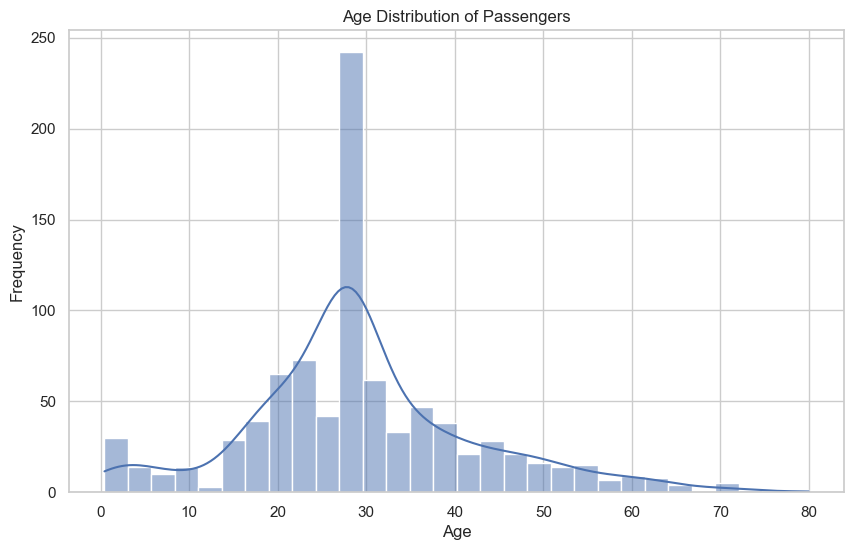

In [7]:
# Plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(train_df_cleaned['Age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

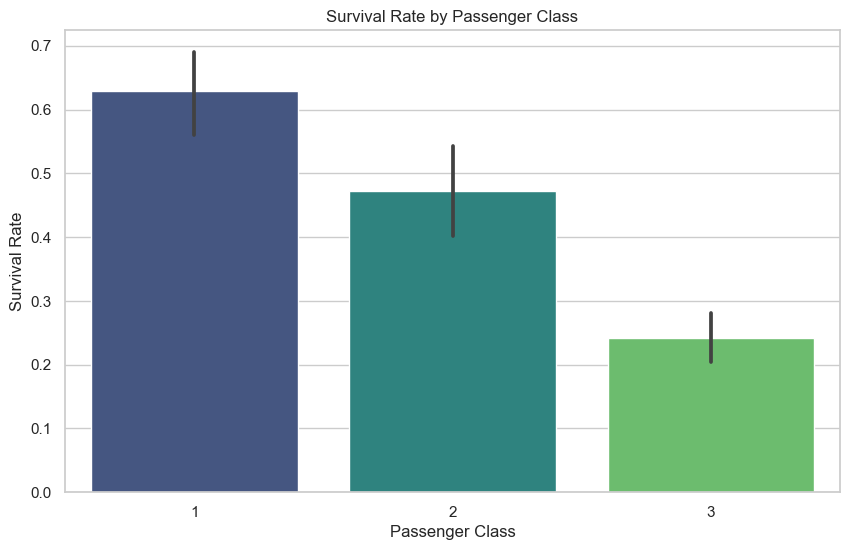

In [8]:
# Plot the survival rate by class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df_cleaned, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

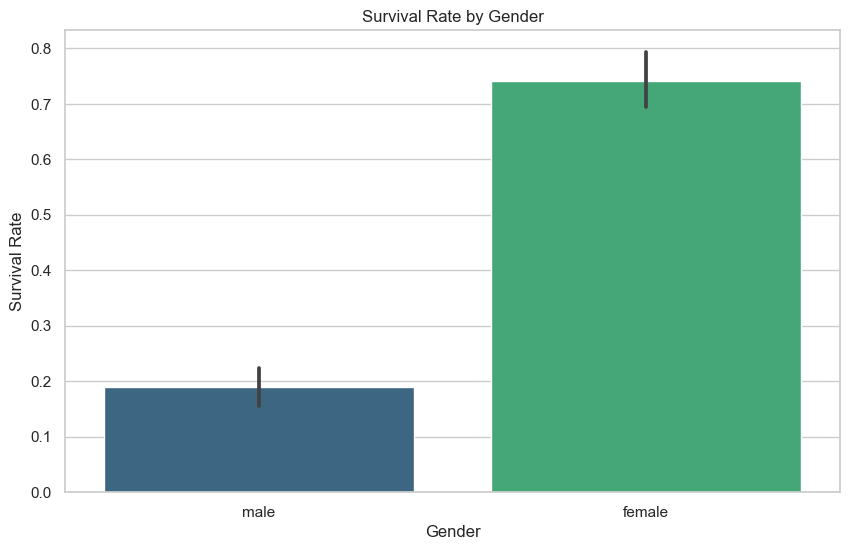

In [9]:
# Plot the survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df_cleaned, palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

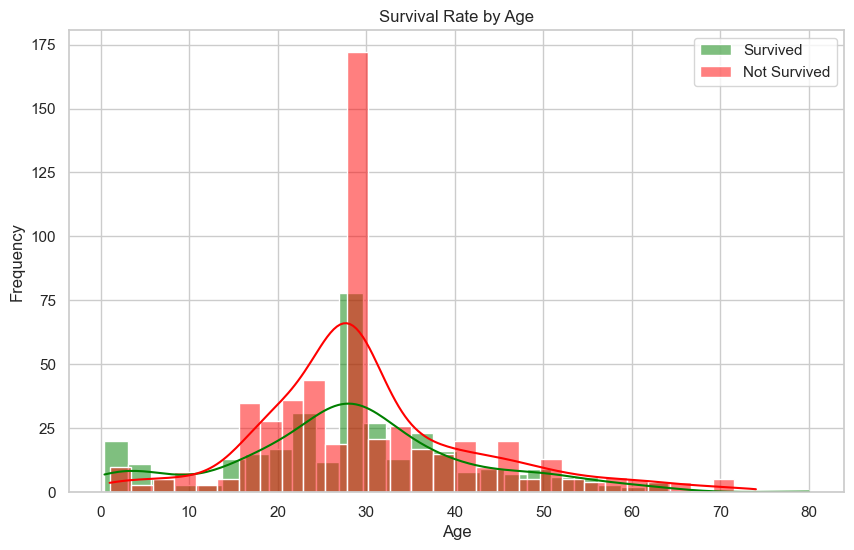

In [10]:
# Plot the survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(train_df_cleaned[train_df_cleaned['Survived'] == 1]['Age'], kde=True, color='green', bins=30, label='Survived')
sns.histplot(train_df_cleaned[train_df_cleaned['Survived'] == 0]['Age'], kde=True, color='red', bins=30, label='Not Survived')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()